In [31]:
import tarfile 
  
with tarfile.open('results/jetson.tar.gz') as file:
    file.extractall('./analysis/')

In [32]:
import pandas as pd
import os

jetson_metrics_dir = "analysis/jetson/metrics/"

directory = os.fsencode(jetson_metrics_dir)
jetson_dataframes = {}
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        training_type = filename.split('-')[2]
        jetson_dataframes[training_type] = pd.read_csv(f"{jetson_metrics_dir}{filename}")

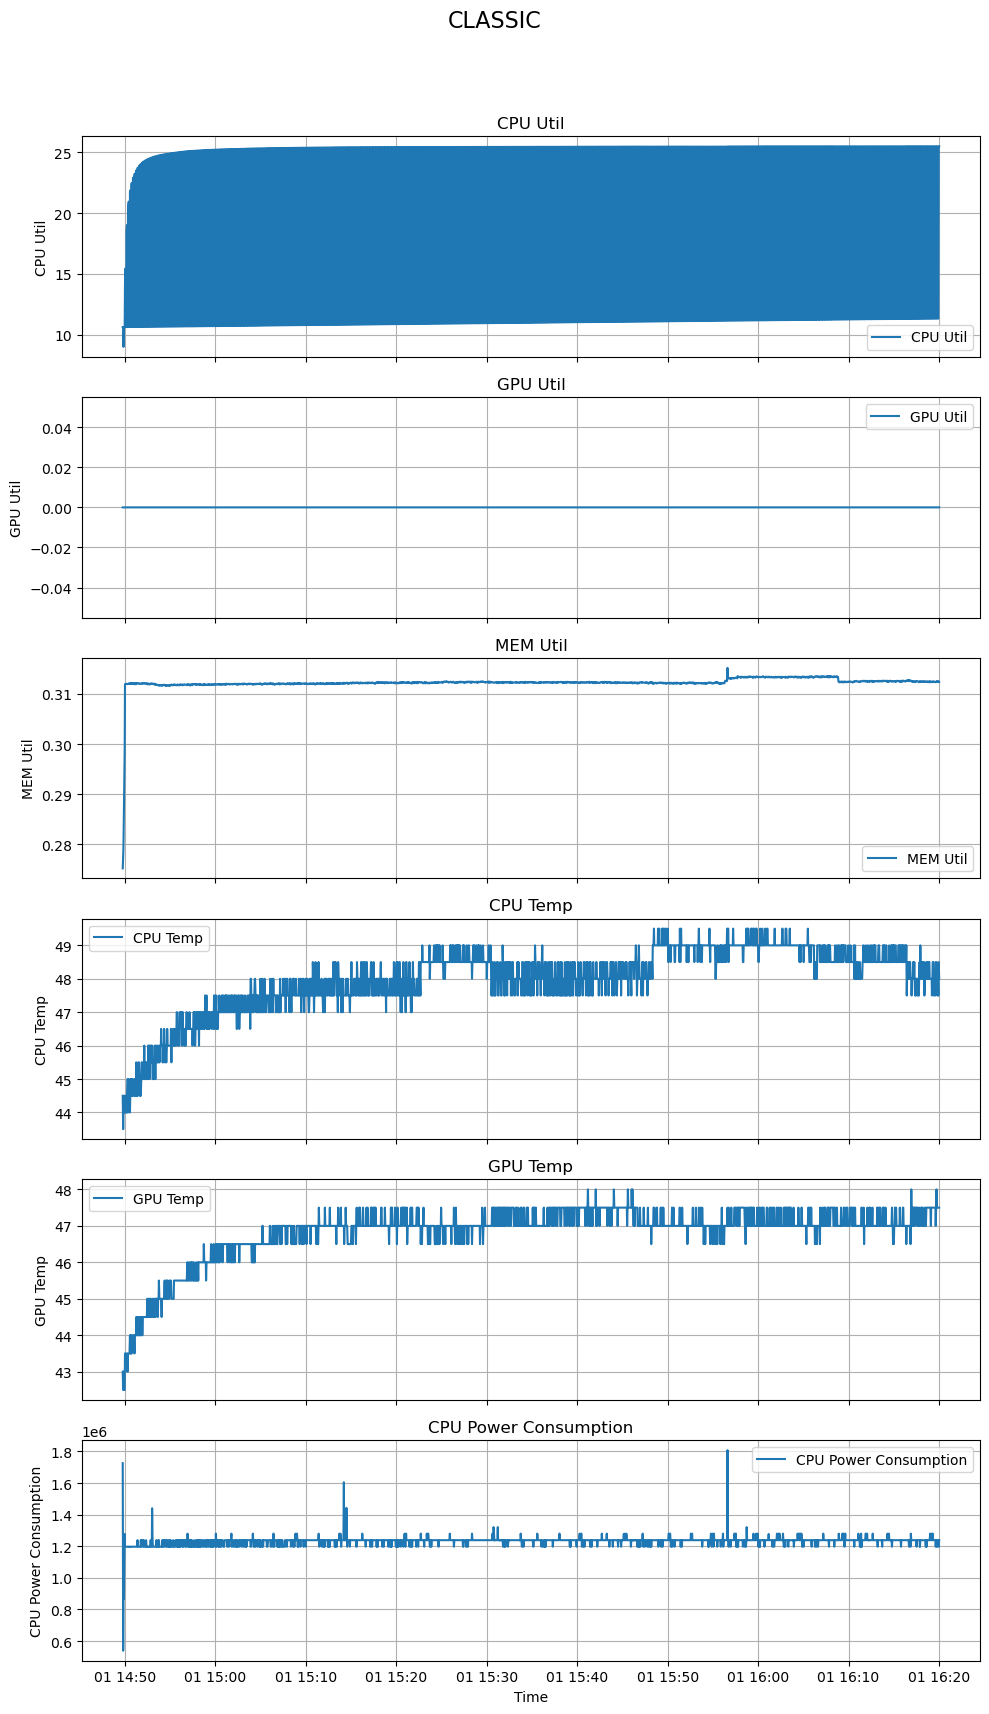

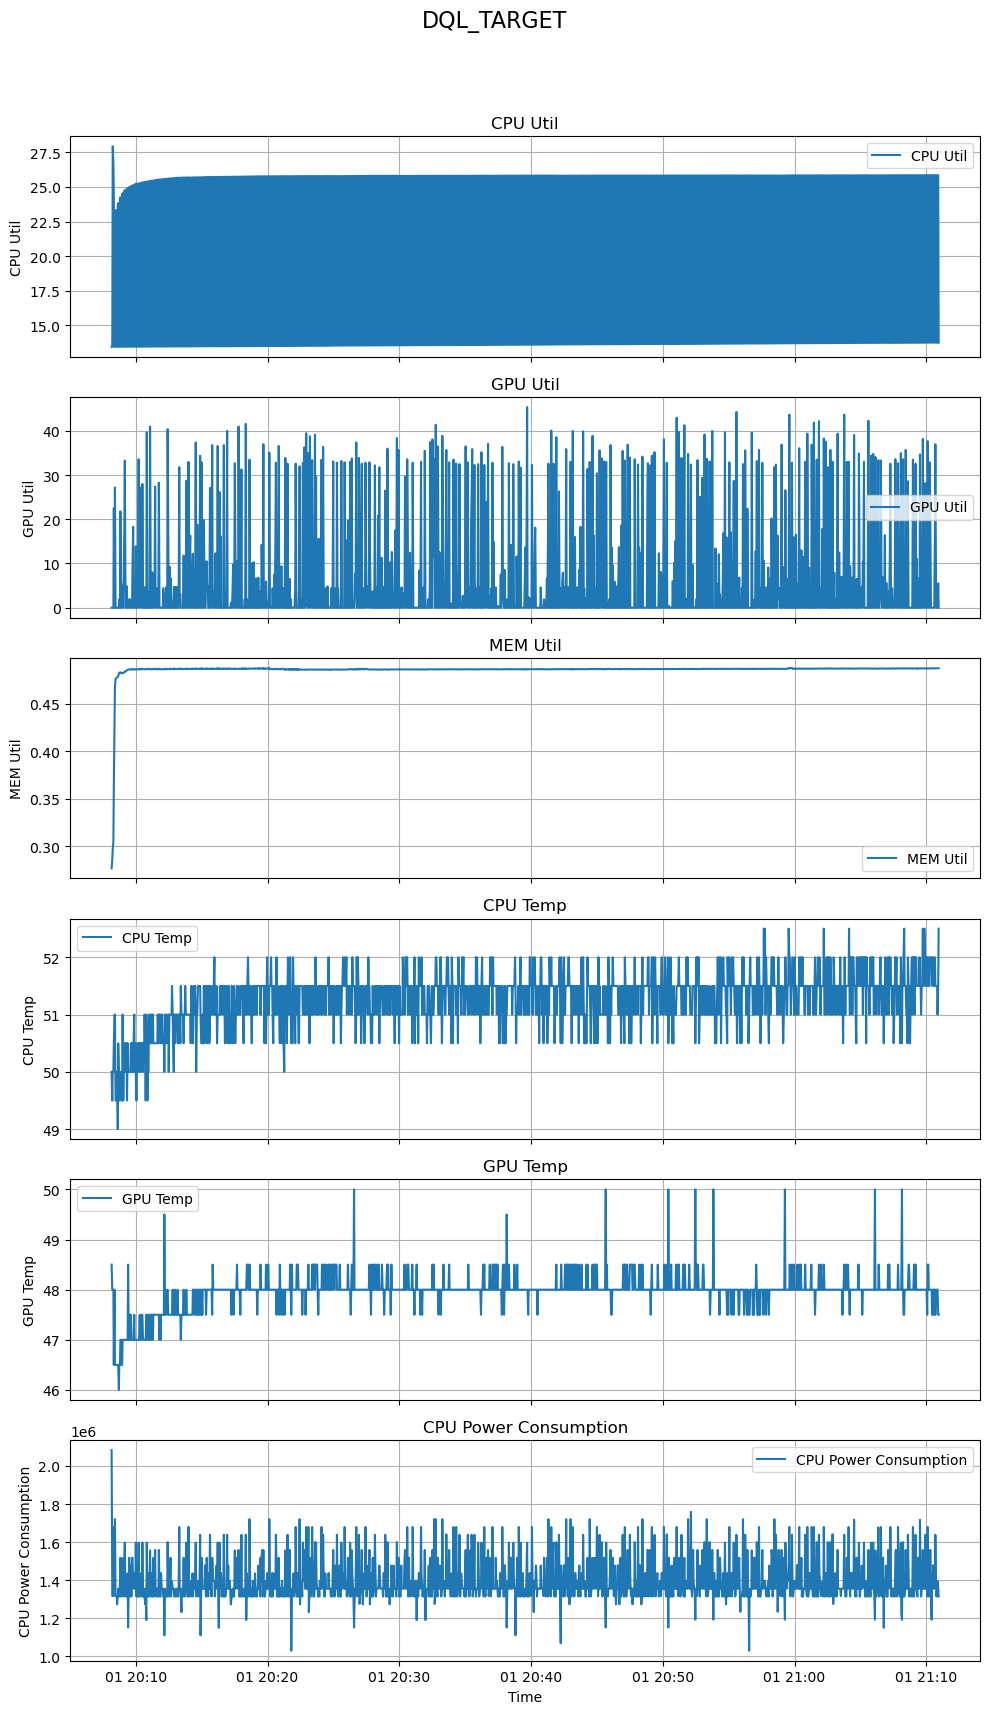

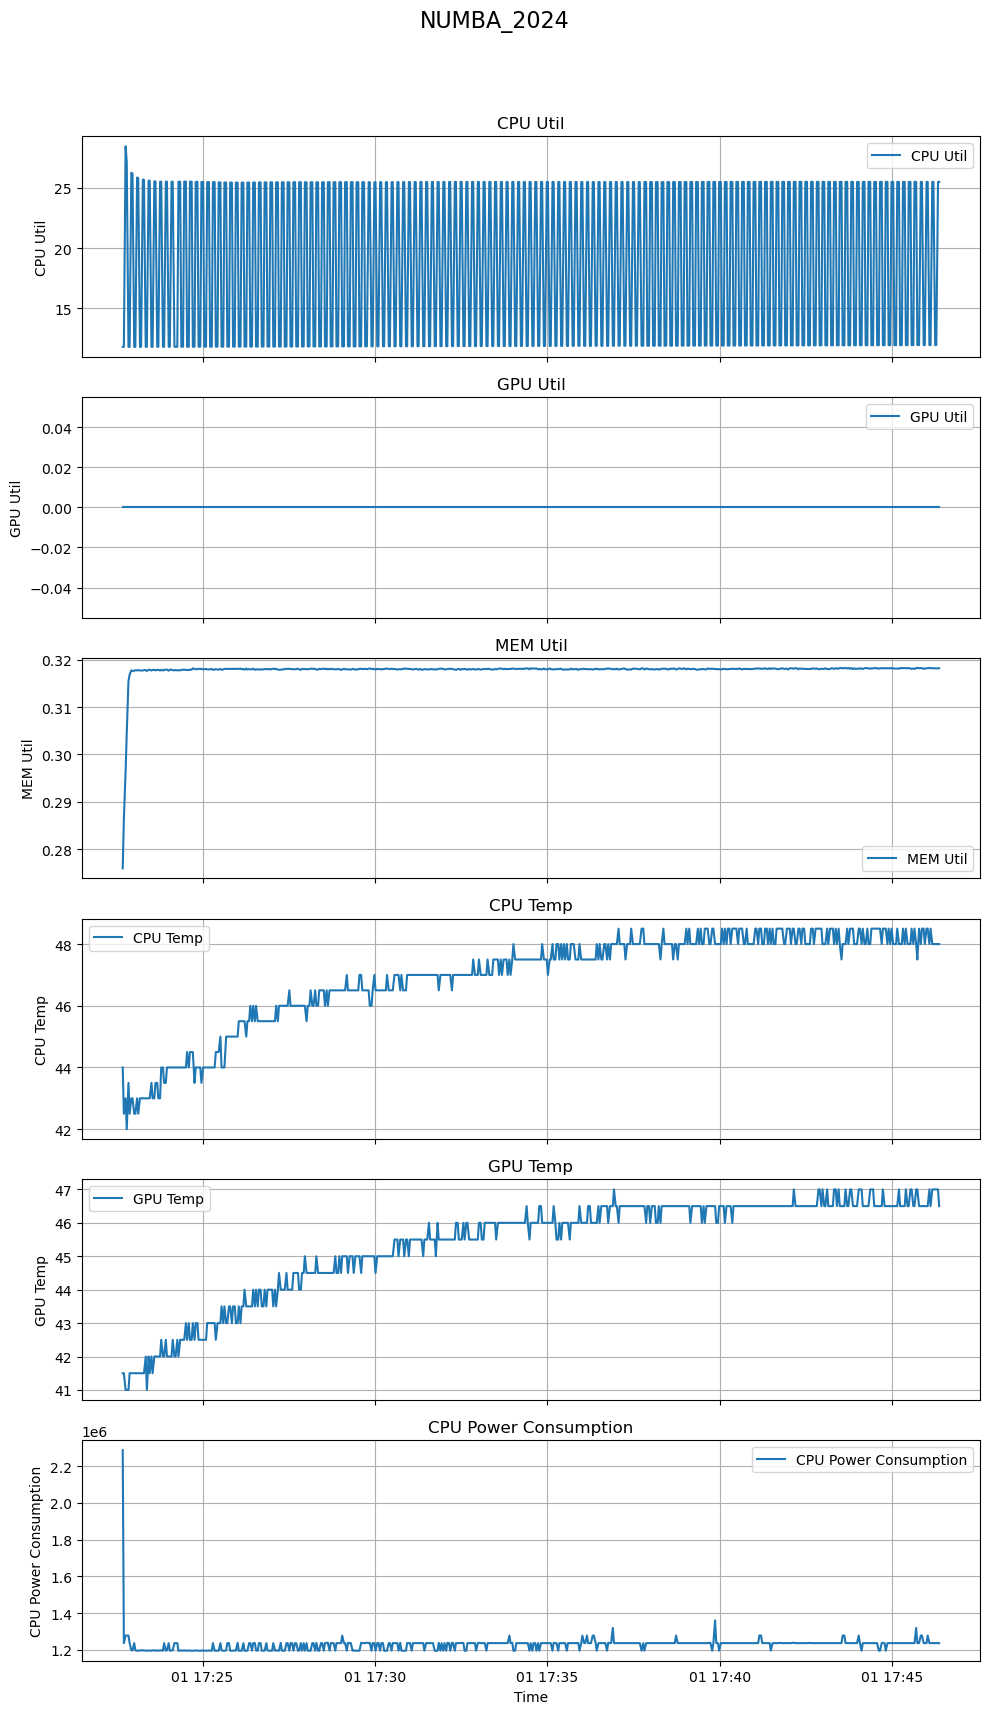

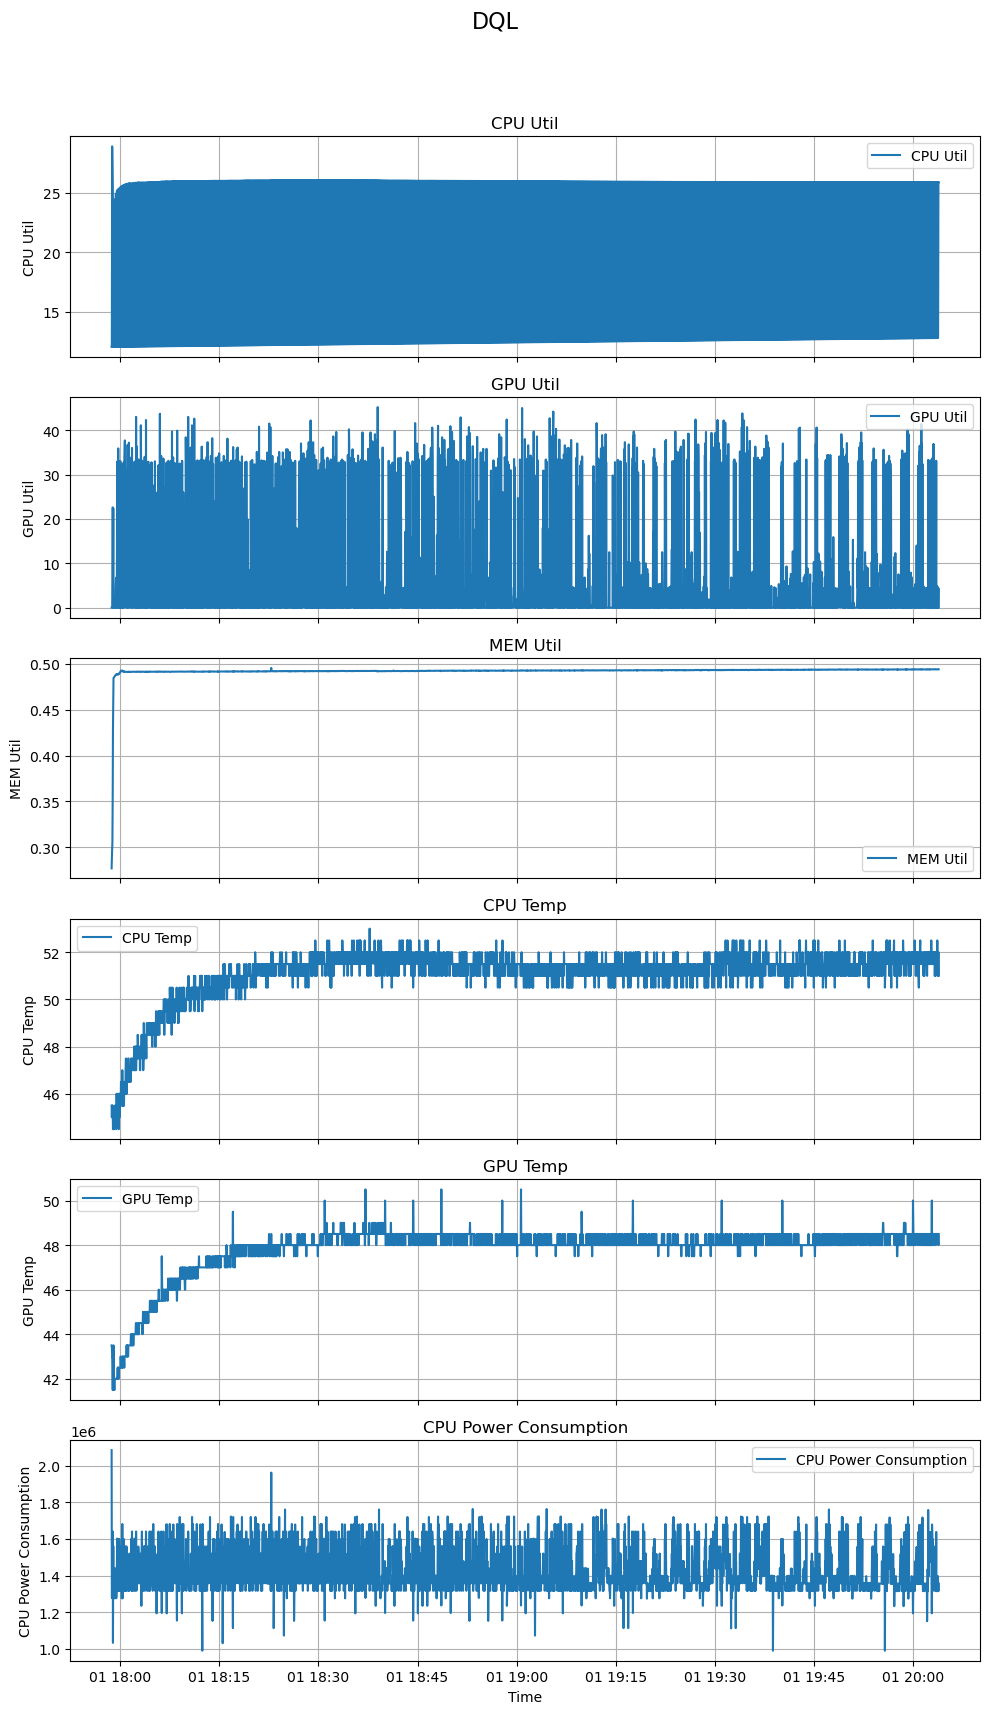

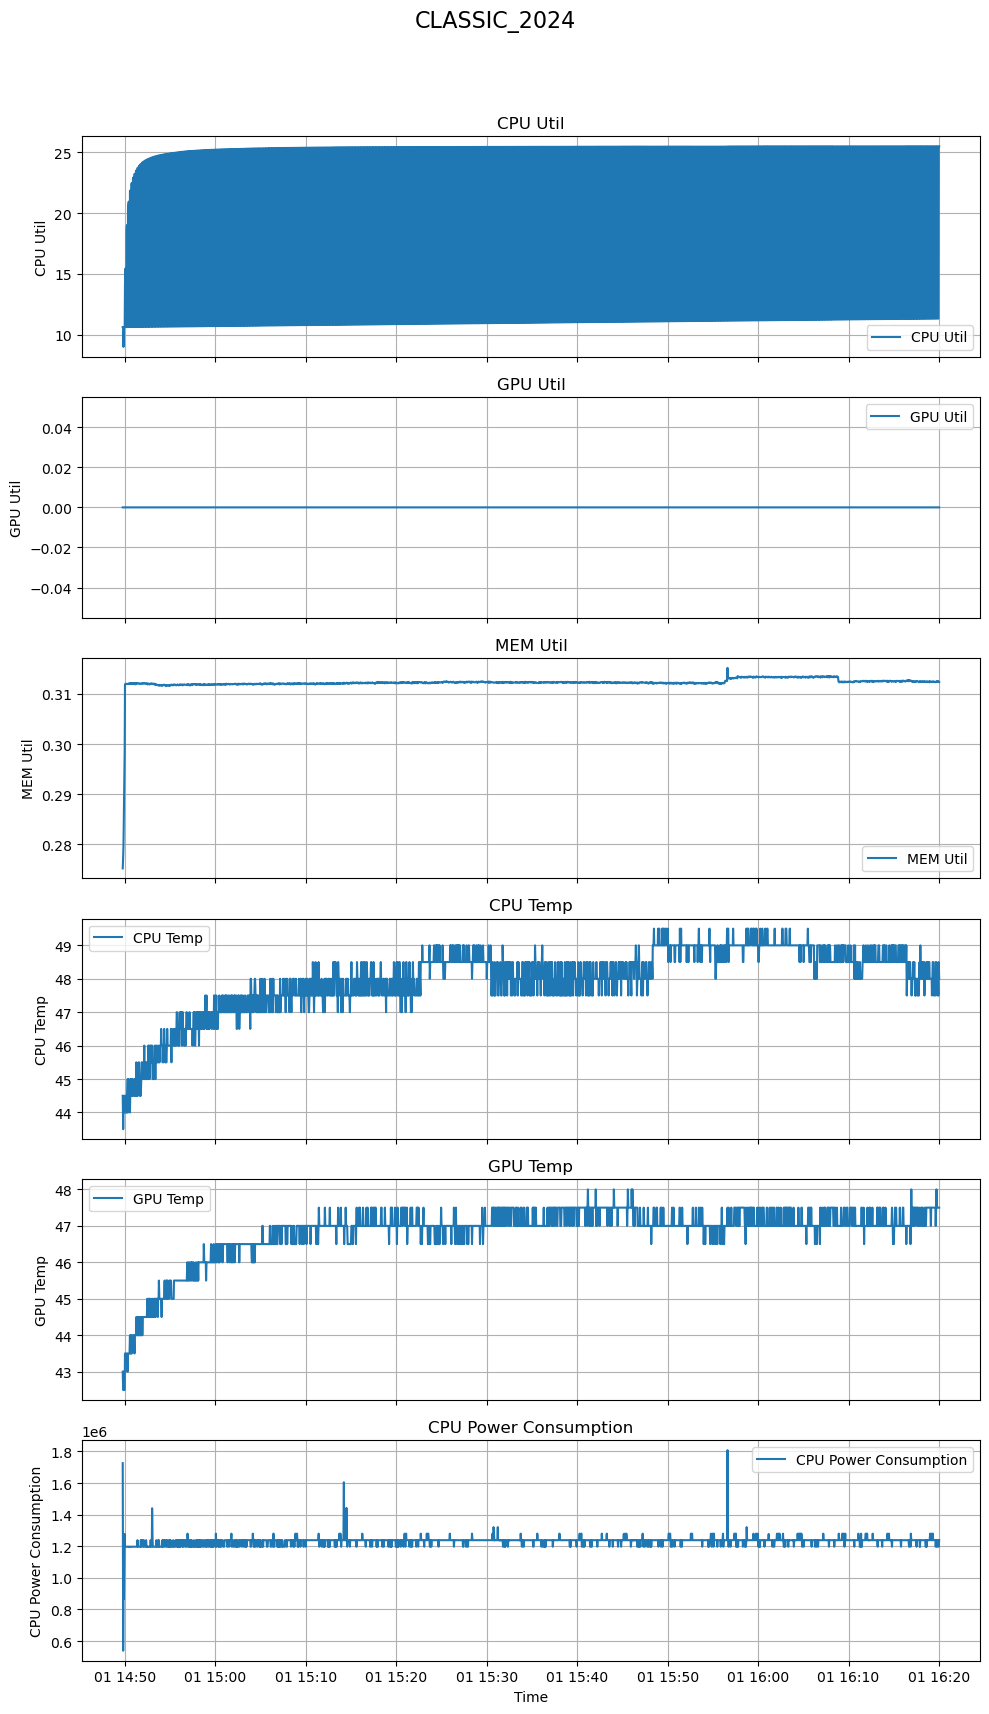

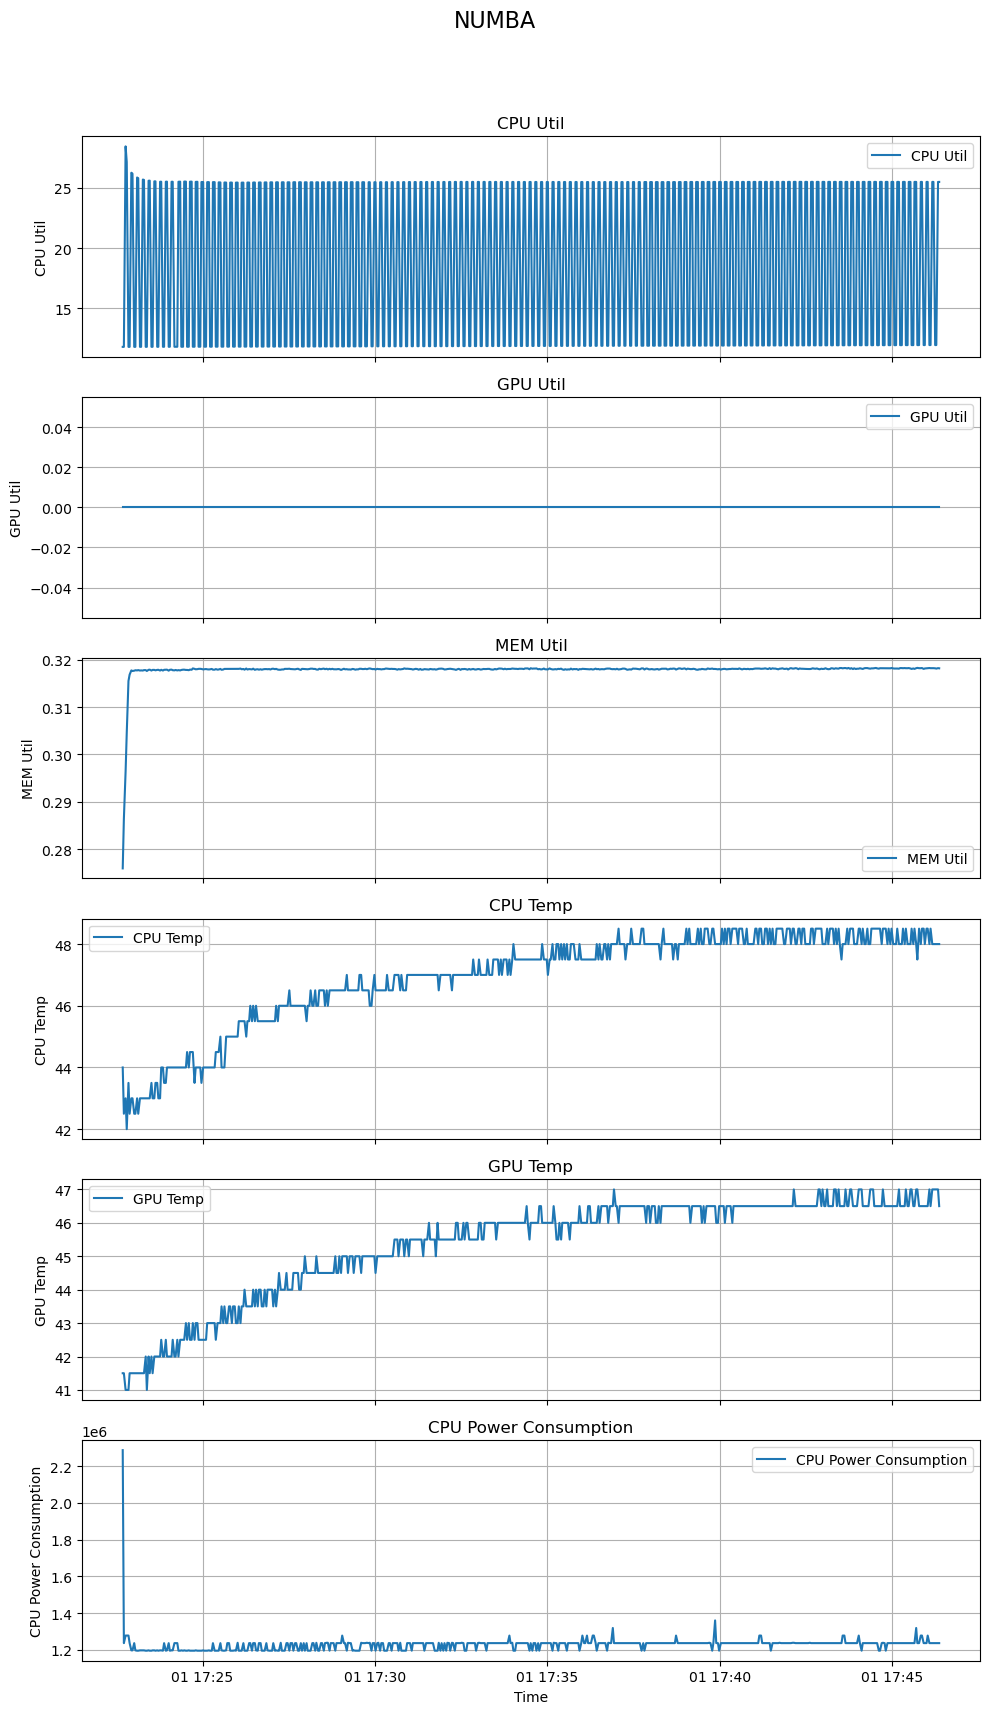

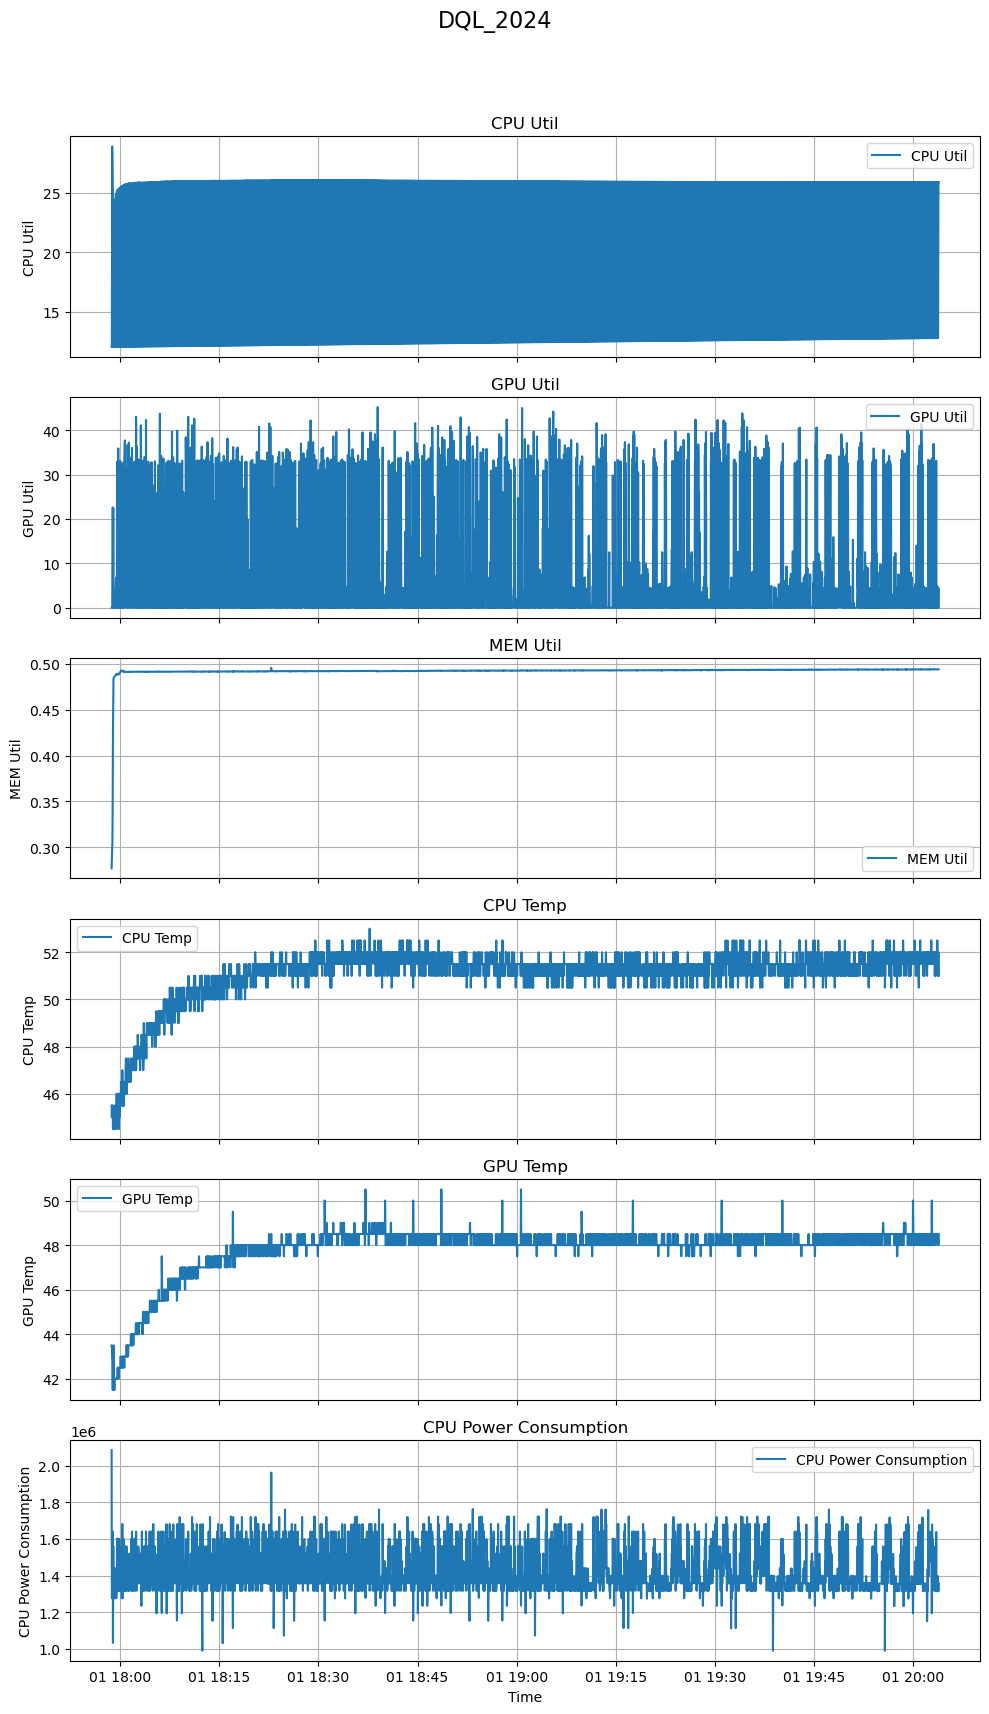

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict


def plot_dataframes(dataframes: Dict[str, pd.DataFrame]):
    for training_type, df in dataframes.items():
        df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
        fig, axs = plt.subplots(6, 1, figsize=(10, 18), sharex=True)
        fig.suptitle(training_type.upper(), fontsize=16)
        
        metrics = ['CPU Util', 'GPU Util', 'MEM Util', 'CPU Temp', 'GPU Temp', 'CPU Power Consumption', 'GPU Power Consumption']
        for ax, metric in zip(axs, metrics):
            ax.plot(df['Time'], df[metric], label=metric, linewidth=1.5)
            ax.set_title(metric)
            ax.set_ylabel(metric)
            ax.grid(True)
            ax.legend()

        plt.xlabel('Time')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_dataframes(jetson_dataframes)
